# Clustering for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from definitions import *
from utils import *

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 's_MAIN_ID', 's_class','s_simbad', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevtevsimbadxmm_001_normalized.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins + path_to_catalog, sep='\t')
print(path_to_gamma_bins +path_to_catalog)
spectra.head()

/home/masha/PycharmProjects/gamma-bins/markeddata/gevtevsimbadxmm_001_normalized.txt


,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,s_class,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked
0,0.081597,0.083385,0.087549,0.080252,0.072789,0.058810,0.053713,0.056084,0.054118,0.054577,...,[],b'1FGL J0007.0+7303 ',b'PSR ',119.662102,10.460557,b'',"b'pwn,snr'",10.203682,119.580254,0
1,0.081538,0.073453,0.073100,0.074908,-0.000000,0.068704,0.068562,0.076194,0.070171,0.066850,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
2,0.066945,0.059547,0.057954,0.058218,0.062214,0.068519,0.068377,0.075988,0.069982,0.066670,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
3,0.073762,0.066913,0.065305,0.065872,0.078508,0.064035,0.063903,0.071016,0.065403,0.062307,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
4,0.070027,0.062603,0.060849,0.062475,0.067580,0.066680,0.066542,0.073949,0.068104,0.064880,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0


In [5]:
spectra = spectra.copy()
spectra = spectra.reset_index(drop=True)

In [6]:
spectrum_columns = list_gev_spectrum_columns() + list_tev_spectrum_columns()

In [7]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

In [8]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
colors = list(colors.values())[19:]

* ### earth mover's distance

In [9]:
# earth mover's distance
metric_function = st.wasserstein_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function, n_jobs=6)
# spectra_distances = get_distance_metric(metric_function).pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

In [10]:
from utils import *

Clustering


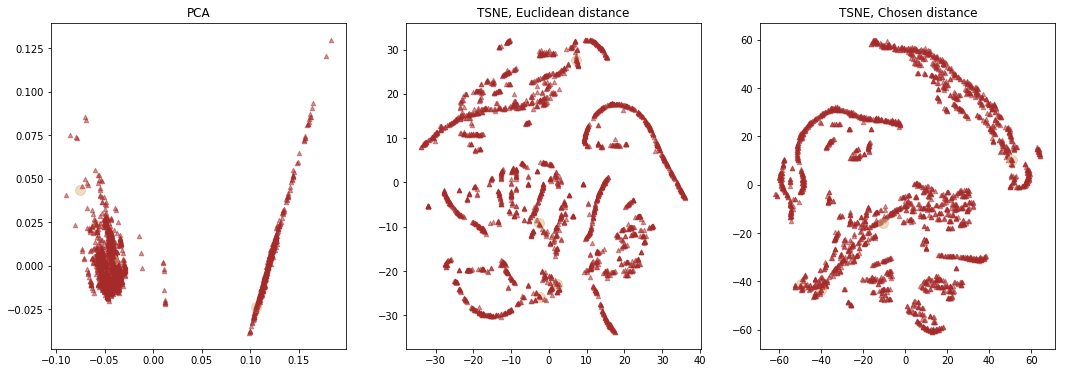

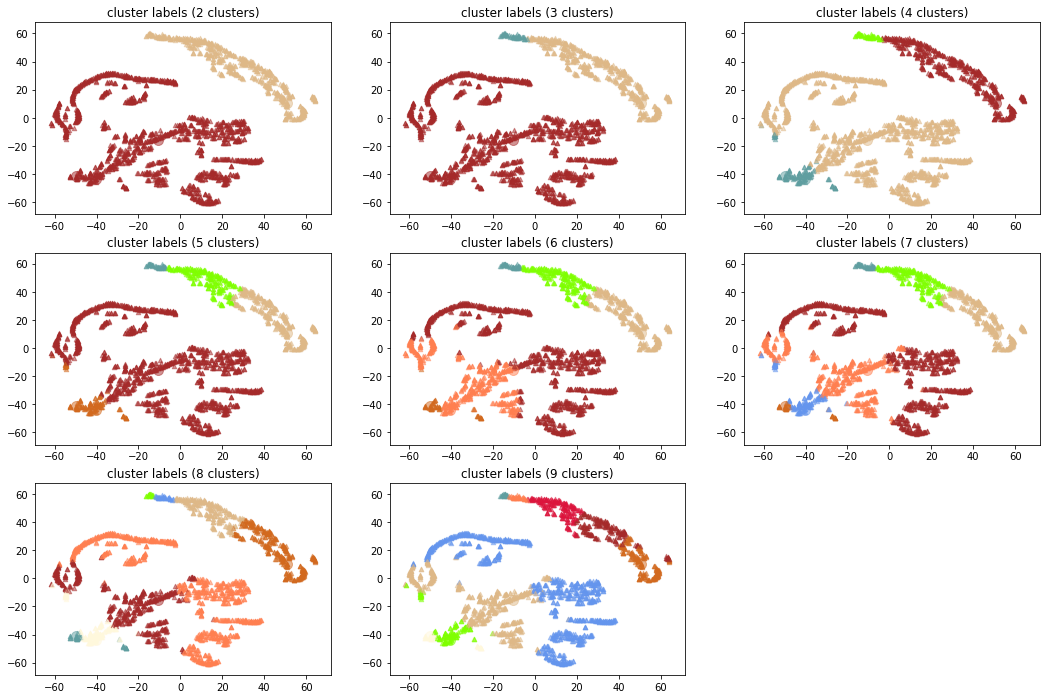

In [11]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=300, TSNE_n_iter=340, TSNE_learning_rate2=200)

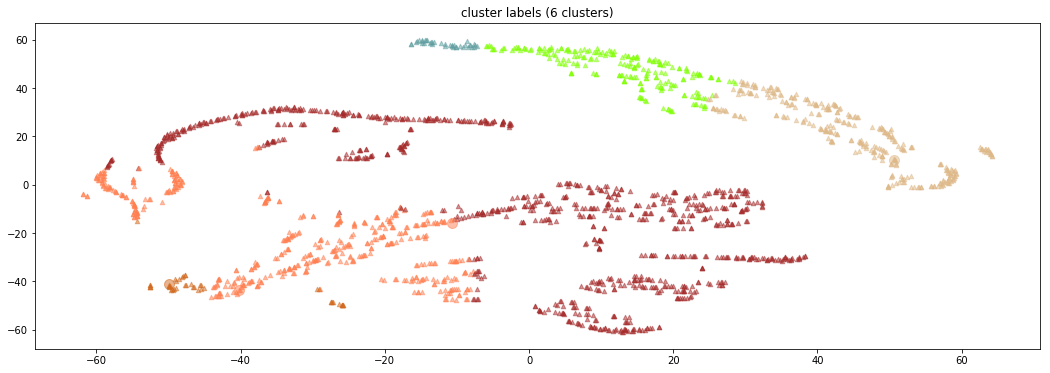

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked,KMeans_clusters_6
209,-0.000000,-0.000000,0.103970,-0.000000,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1,4
495,-0.000000,0.090377,0.091078,0.095727,-0.000000,0.075041,0.066570,0.066411,0.068538,0.066934,...,b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1,5
1610,-0.000000,0.089099,0.086865,0.086916,0.091221,0.070010,0.062826,0.060273,0.066035,0.061373,...,b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1,5
1835,0.127572,0.114688,0.111631,0.117882,0.116053,0.088584,0.079311,0.083231,0.080495,0.080552,...,b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1,1


0 cluster (#A52A2A)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
8,b' ',b'snr ',b'',b'snr',[],[],0,0
11,b' ',b'snr ',b'',b'snr',[],[],0,0
13,b' ',b'snr ',b'',b'snr',[],[],0,0
14,b' ',b'snr ',b'',b'snr',[],[],0,0
15,b' ',b'snr ',b'',b'snr',[],[],0,0
16,b' ',b'snr ',b'',b'snr',[],[],0,0
21,b' ',b'snr ',b'',b'snr',[],[],0,0
23,b' ',b'snr ',b'',b'snr',[],[],0,0
24,b' ',b'snr ',b'',b'snr',[],[],0,0


1 cluster (#DEB887)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
101,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
102,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
104,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
105,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
107,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
108,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
109,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
112,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
113,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
114,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


2 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
117,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
119,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
133,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
138,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
149,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
151,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
164,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
178,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
242,b' ',b'rdg ',b'',b'hbl',[],[],0,0
323,b' ',b'bll ',b'',b'hbl',[],[],0,0


3 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
100,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
103,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
106,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
110,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
111,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
115,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
124,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
127,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
128,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
132,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


4 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
45,b' ',b'snr ',b'',b'snr',[],[],0,0
55,b' ',b'snr ',b'',b'snr',[],[],0,0
84,b' ',b'snr ',b'',b'snr',[],[],0,0
209,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
273,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
275,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
276,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
355,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
369,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
416,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0


5 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
3,b' ',b'snr ',b'',b'snr',[],[],0,0
4,b' ',b'snr ',b'',b'snr',[],[],0,0
5,b' ',b'snr ',b'',b'snr',[],[],0,0
6,b' ',b'snr ',b'',b'snr',[],[],0,0
7,b' ',b'snr ',b'',b'snr',[],[],0,0
9,b' ',b'snr ',b'',b'snr',[],[],0,0
10,b' ',b'snr ',b'',b'snr',[],[],0,0
12,b' ',b'snr ',b'',b'snr',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.060026,0.057666,0.061243,0.058283,0.057750,0.0,0.059459,0.061371,0.063077,0.065843,0.068789
1,0.092791,0.083762,0.084788,0.085901,0.083045,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.132119,0.124833,0.124737,0.127976,0.124665,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.102601,0.096622,0.098066,0.097790,0.097288,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.076034,0.071687,0.081555,0.072908,0.071478,0.0,0.075299,0.076682,0.078034,0.064430,0.063716
5,0.065531,0.063569,0.071154,0.064179,0.063645,0.0,0.064839,0.067053,0.068449,0.070480,0.072546


In [12]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 6, colors,spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

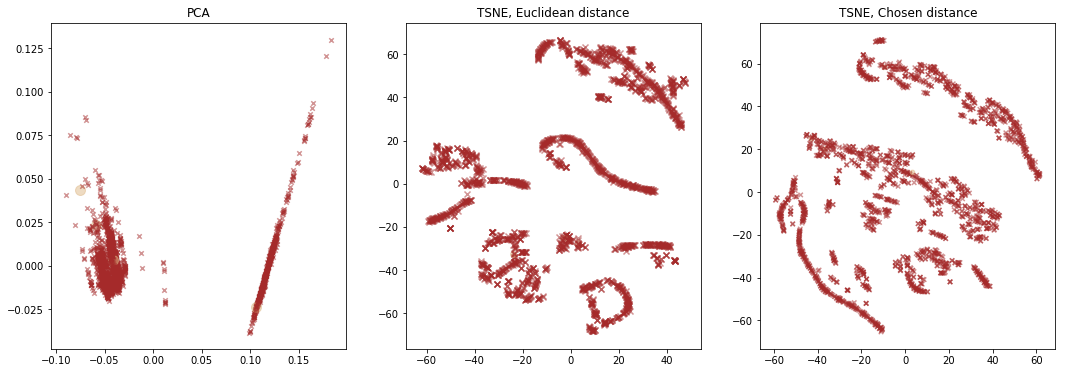

Clustering


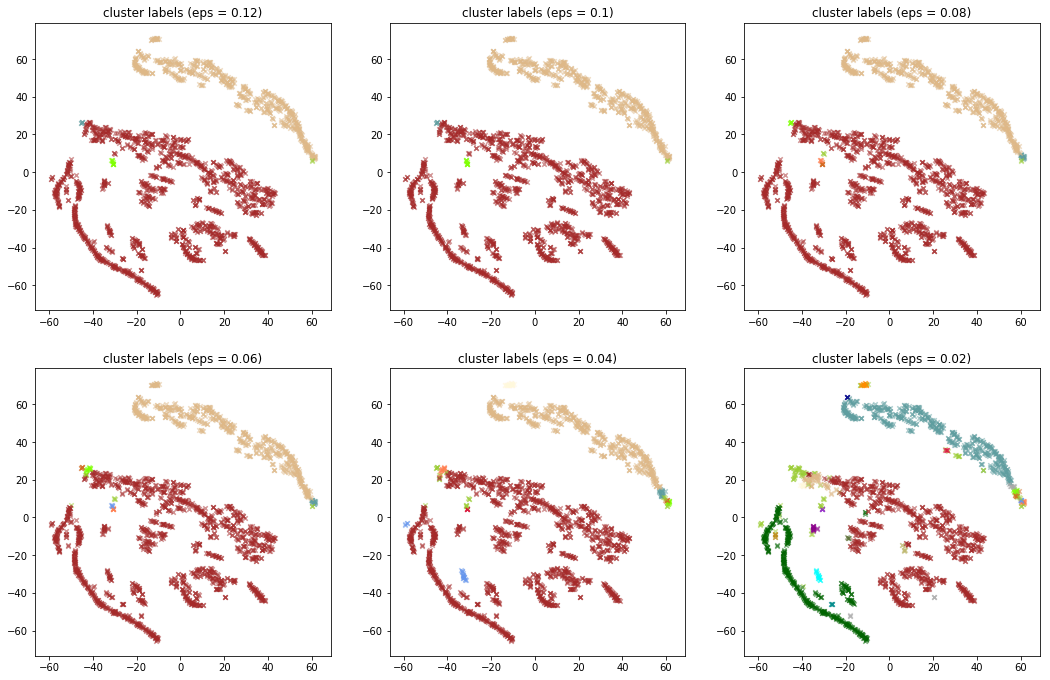

In [13]:
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

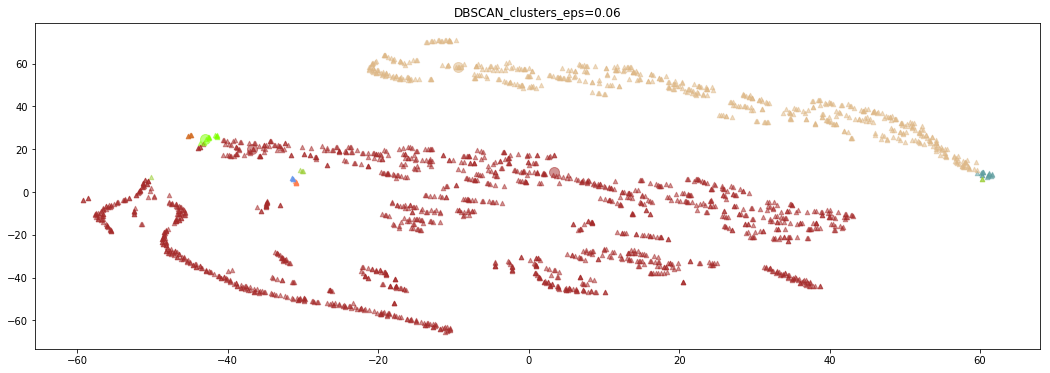

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked,DBSCAN_clusters_eps=0.06
209,-0.000000,-0.000000,0.103970,-0.000000,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1,3
495,-0.000000,0.090377,0.091078,0.095727,-0.000000,0.075041,0.066570,0.066411,0.068538,0.066934,...,b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1,0
1610,-0.000000,0.089099,0.086865,0.086916,0.091221,0.070010,0.062826,0.060273,0.066035,0.061373,...,b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1,0
1835,0.127572,0.114688,0.111631,0.117882,0.116053,0.088584,0.079311,0.083231,0.080495,0.080552,...,b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1,1


0 cluster (#A52A2A)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
1,b' ',b'snr ',b'',b'snr',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
3,b' ',b'snr ',b'',b'snr',[],[],0,0
4,b' ',b'snr ',b'',b'snr',[],[],0,0
5,b' ',b'snr ',b'',b'snr',[],[],0,0
6,b' ',b'snr ',b'',b'snr',[],[],0,0
7,b' ',b'snr ',b'',b'snr',[],[],0,0
8,b' ',b'snr ',b'',b'snr',[],[],0,0
9,b' ',b'snr ',b'',b'snr',[],[],0,0


1 cluster (#DEB887)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
100,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
101,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
102,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
103,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
104,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
105,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
106,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
107,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
108,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
109,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


2 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
138,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
149,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
151,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
164,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
434,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
446,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
454,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
464,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
472,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
869,b'1FGL J1322.0-4515 ',b'RDG ',b'',b'fri',[],[],0,0


3 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
209,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
369,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
416,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0
418,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0
948,b'1FGL J1428.7+4239 ',b'bll ',b'',b'hbl',[],[],0,0
1049,b'1FGL J1626.0-4917c',b' ',b'',b'unid',[],[],0,0
1236,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1250,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1429,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0
1520,b'1FGL J1808.5-1954c',b'glc ',b'',b'unid',[],[],0,0


4 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1182,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1188,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1420,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0
1870,b'1FGL J2323.4+5849 ',b'snr ',b'',b'snr',[],[],0,0
1937,b'1FGL J2323.4+5849 ',b'snr ',b'',b'snr',[],[],0,0


5 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1689,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1690,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1691,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1693,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1694,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1696,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0


6 cluster (#6495ED)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1692,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1695,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1697,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1698,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0


7 cluster (#FFF8DC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
355,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
1336,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
1353,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
1832,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0
1833,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0
1834,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.062075,0.059860,0.064987,0.060478,0.059941,0.0,0.061477,0.063504,0.065094,0.067593,0.070273
1,0.097920,0.090231,0.091403,0.092006,0.090132,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.141626,0.134295,0.130896,0.137761,0.132491,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.078617,0.074841,0.081511,0.076338,0.074815,0.0,0.079343,0.080883,0.081820,0.084579,0.088236
4,0.087451,0.080477,0.101665,0.082001,0.081530,0.0,0.087105,0.090735,0.091308,0.095833,0.101443
5,0.072290,0.062844,0.061752,0.064822,0.060988,0.0,0.067236,0.065330,0.067055,0.000000,0.000000
6,0.080653,0.070115,0.068897,0.072321,0.068044,0.0,0.075015,0.072888,0.074813,0.000000,0.000000
7,0.100731,0.095179,0.102731,0.096435,0.095949,0.0,0.045179,0.046113,0.048681,0.050204,0.016367


In [14]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.06, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [15]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.07141831481209576)

* ### euclidean distance

In [16]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [17]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.2872205285202368)

Clustering


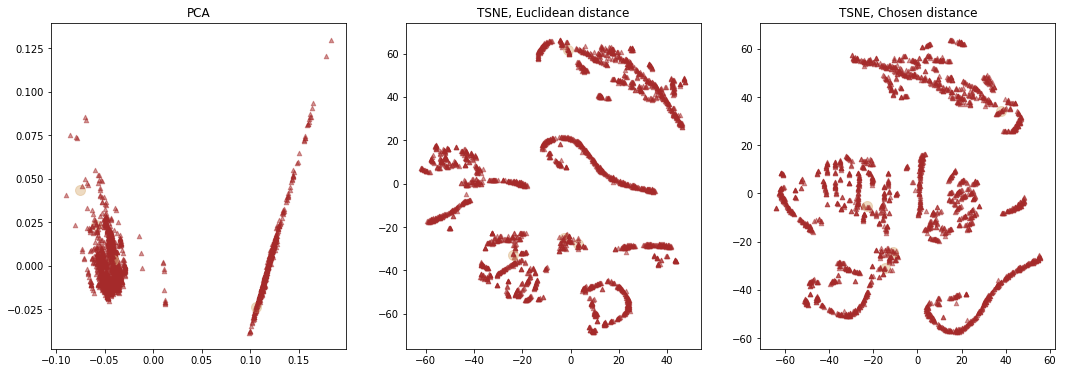

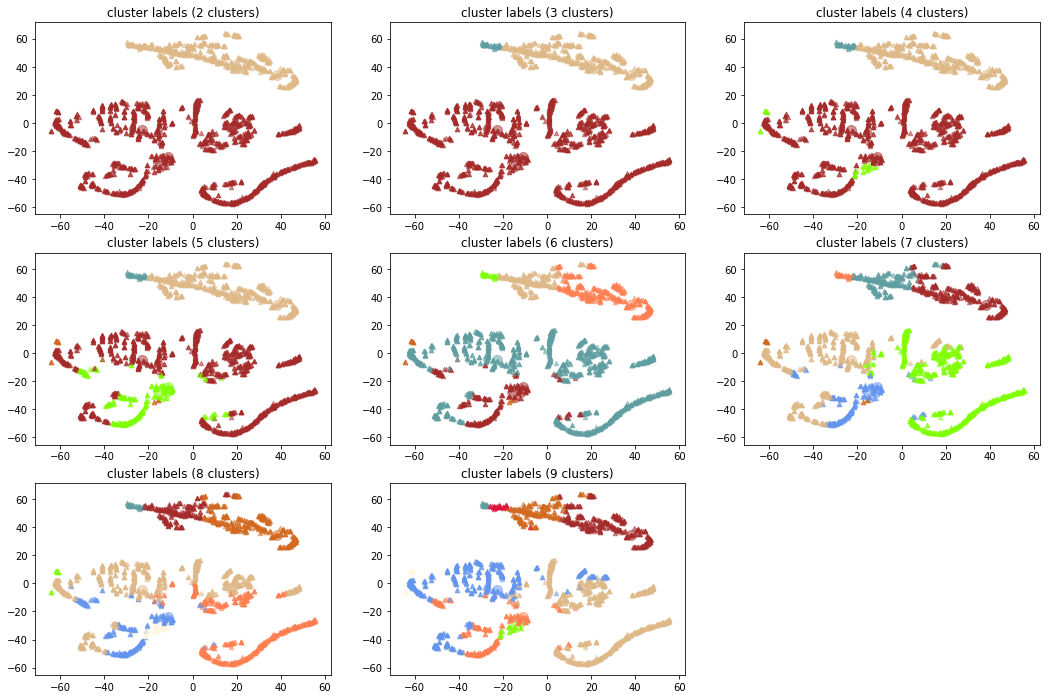

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked,KMeans_clusters_6
209,-0.000000,-0.000000,0.103970,-0.000000,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1,0
495,-0.000000,0.090377,0.091078,0.095727,-0.000000,0.075041,0.066570,0.066411,0.068538,0.066934,...,b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1,0
1610,-0.000000,0.089099,0.086865,0.086916,0.091221,0.070010,0.062826,0.060273,0.066035,0.061373,...,b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1,2
1835,0.127572,0.114688,0.111631,0.117882,0.116053,0.088584,0.079311,0.083231,0.080495,0.080552,...,b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1,5


0 cluster (#A52A2A)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
4,b' ',b'snr ',b'',b'snr',[],[],0,0
9,b' ',b'snr ',b'',b'snr',[],[],0,0
10,b' ',b'snr ',b'',b'snr',[],[],0,0
19,b' ',b'snr ',b'',b'snr',[],[],0,0
20,b' ',b'snr ',b'',b'snr',[],[],0,0
29,b' ',b'snr ',b'',b'snr',[],[],0,0
30,b' ',b'snr ',b'',b'snr',[],[],0,0
32,b' ',b'snr ',b'',b'snr',[],[],0,0


1 cluster (#DEB887)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
100,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
106,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
110,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
111,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
115,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
117,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
124,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
127,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
128,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
132,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


2 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
3,b' ',b'snr ',b'',b'snr',[],[],0,0
5,b' ',b'snr ',b'',b'snr',[],[],0,0
6,b' ',b'snr ',b'',b'snr',[],[],0,0
7,b' ',b'snr ',b'',b'snr',[],[],0,0
8,b' ',b'snr ',b'',b'snr',[],[],0,0
11,b' ',b'snr ',b'',b'snr',[],[],0,0
12,b' ',b'snr ',b'',b'snr',[],[],0,0
13,b' ',b'snr ',b'',b'snr',[],[],0,0
14,b' ',b'snr ',b'',b'snr',[],[],0,0


3 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
119,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
133,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
138,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
149,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
151,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
164,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
242,b' ',b'rdg ',b'',b'hbl',[],[],0,0
323,b' ',b'bll ',b'',b'hbl',[],[],0,0
434,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
439,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0


4 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1182,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1188,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1420,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0
1689,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1690,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1691,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1692,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1693,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1694,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1695,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0


5 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
101,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
102,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
103,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
104,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
105,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
107,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
108,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
109,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
112,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
113,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.066688,0.064879,0.079553,0.065390,0.065284,0.0,0.066812,0.069020,0.070286,0.072634,0.074862
1,0.103802,0.097989,0.099167,0.099071,0.098685,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.061214,0.058891,0.061884,0.059542,0.058898,0.0,0.060472,0.062456,0.064117,0.066657,0.069453
3,0.135143,0.127811,0.128504,0.130985,0.128046,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.077472,0.070637,0.076345,0.071980,0.070078,0.0,0.074367,0.074303,0.075930,0.038290,0.028179
5,0.093195,0.084254,0.085359,0.086422,0.083558,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

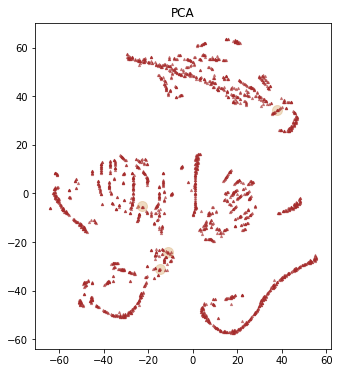

In [ ]:
markers = ['^', 'o']
cols = spectra['marked'].apply(lambda x: colors[x])
col = spectra['marked']

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
for i in range(len(spectra_2D)):
        #print(i)
        #print(spectra_2D[i, 0])
        #print(spectra_2D[i, 1])
        #print(cols[i])
        #print(col[i])
        if col[i] == 0:
            markersize = 5
        else:
            markersize = 100
        plt.scatter(spectra_2D[i, 0], spectra_2D[i, 1], c=cols[i], alpha=0.5, marker=markers[col[i]], s=markersize)

[1.2000000000000002, 1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


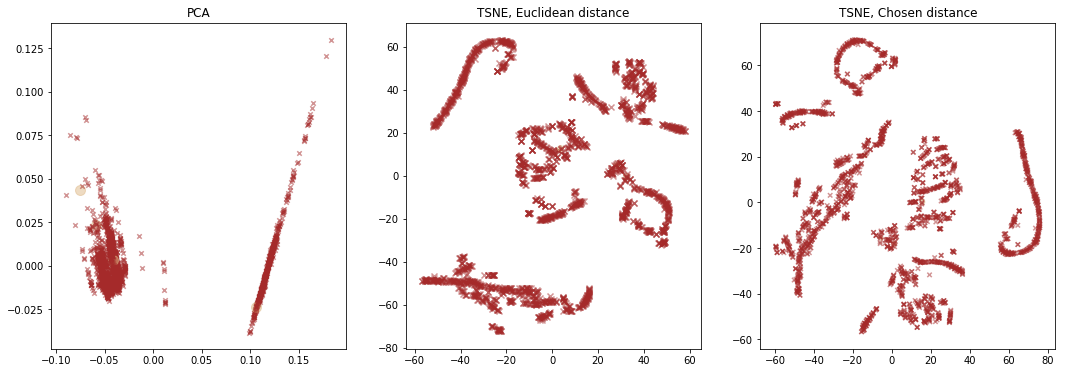

Clustering


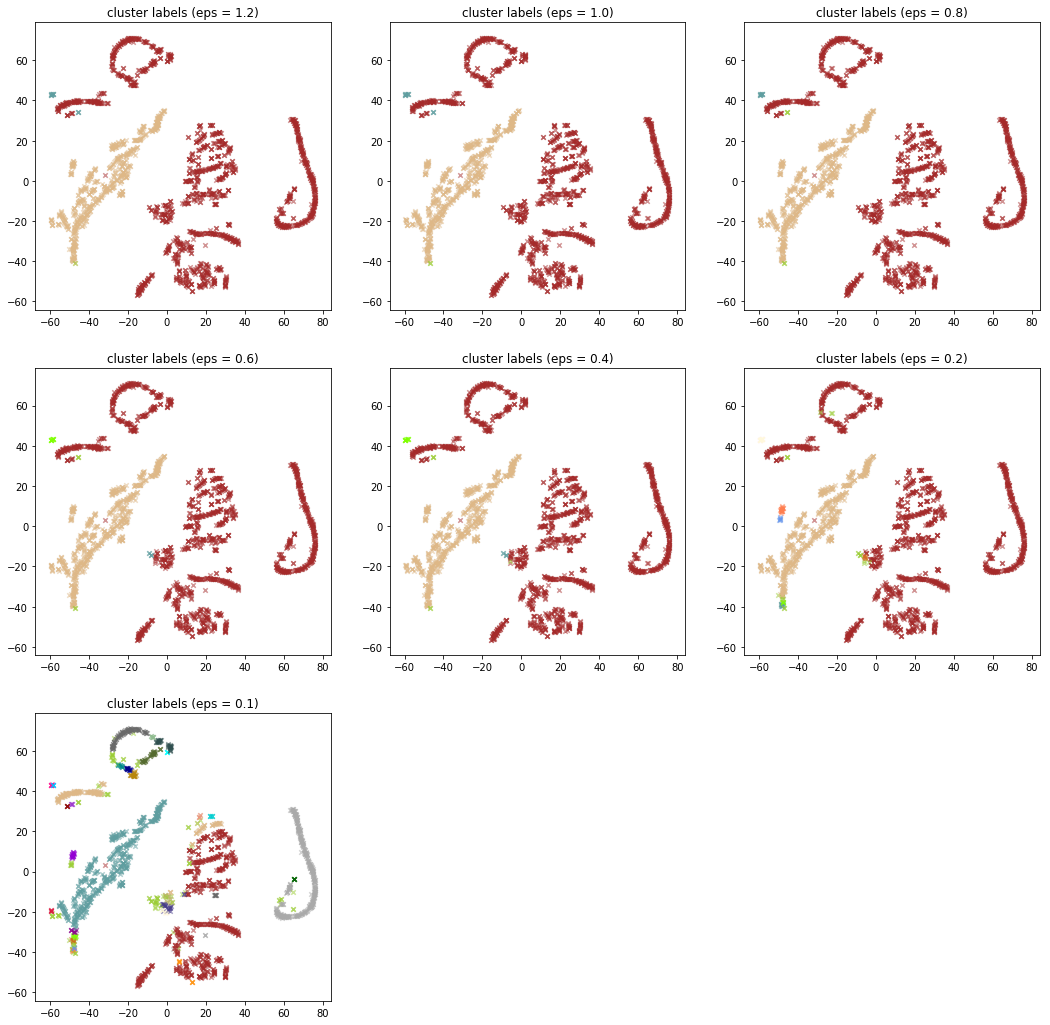

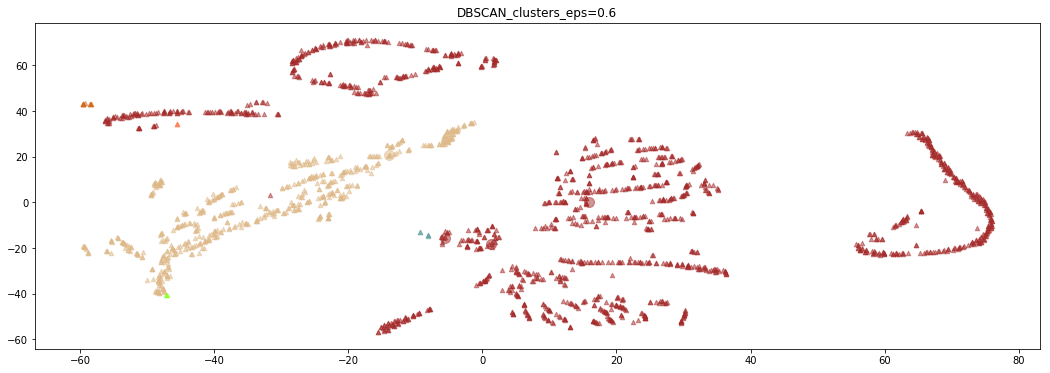

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked,DBSCAN_clusters_eps=0.6
209,-0.000000,-0.000000,0.103970,-0.000000,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1,0
495,-0.000000,0.090377,0.091078,0.095727,-0.000000,0.075041,0.066570,0.066411,0.068538,0.066934,...,b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1,0
1610,-0.000000,0.089099,0.086865,0.086916,0.091221,0.070010,0.062826,0.060273,0.066035,0.061373,...,b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1,0
1835,0.127572,0.114688,0.111631,0.117882,0.116053,0.088584,0.079311,0.083231,0.080495,0.080552,...,b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1,1


0 cluster (#A52A2A)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
1,b' ',b'snr ',b'',b'snr',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
3,b' ',b'snr ',b'',b'snr',[],[],0,0
4,b' ',b'snr ',b'',b'snr',[],[],0,0
5,b' ',b'snr ',b'',b'snr',[],[],0,0
6,b' ',b'snr ',b'',b'snr',[],[],0,0
7,b' ',b'snr ',b'',b'snr',[],[],0,0
8,b' ',b'snr ',b'',b'snr',[],[],0,0
9,b' ',b'snr ',b'',b'snr',[],[],0,0


1 cluster (#DEB887)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
100,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
101,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
102,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
103,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
104,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
105,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
106,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
107,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
108,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
109,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


2 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1182,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1188,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
1420,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0
1870,b'1FGL J2323.4+5849 ',b'snr ',b'',b'snr',[],[],0,0
1937,b'1FGL J2323.4+5849 ',b'snr ',b'',b'snr',[],[],0,0


3 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1336,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
1353,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0


4 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1689,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1690,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1691,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1692,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1693,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1694,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1695,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1696,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1697,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1698,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0


5 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1832,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0
1833,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0
1834,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.062219,0.059990,0.065128,0.060616,0.060071,0.0,0.061636,0.063661,0.065250,0.067755,0.070447
1,0.099115,0.091435,0.092482,0.093256,0.091290,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.087451,0.080477,0.101665,0.082001,0.081530,0.0,0.087105,0.090735,0.091308,0.095833,0.101443
3,0.168618,0.148091,0.165882,0.153647,0.148329,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.075635,0.065752,0.064610,0.067822,0.063810,0.0,0.070348,0.068353,0.070158,0.000000,0.000000
5,0.066961,0.070518,0.073262,0.069140,0.071884,0.0,0.066538,0.066748,0.069539,0.070017,0.000000


In [20]:
eps_l = [0.1 * i for i in range(12, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

* ### cosine distance

In [21]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


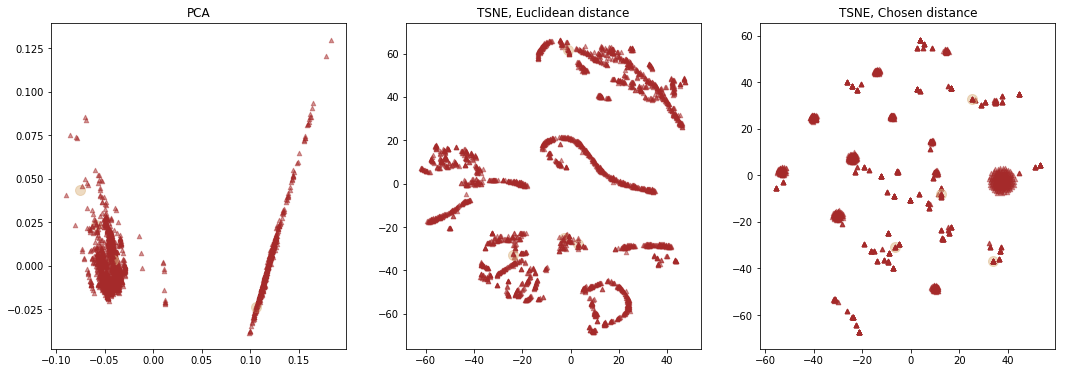

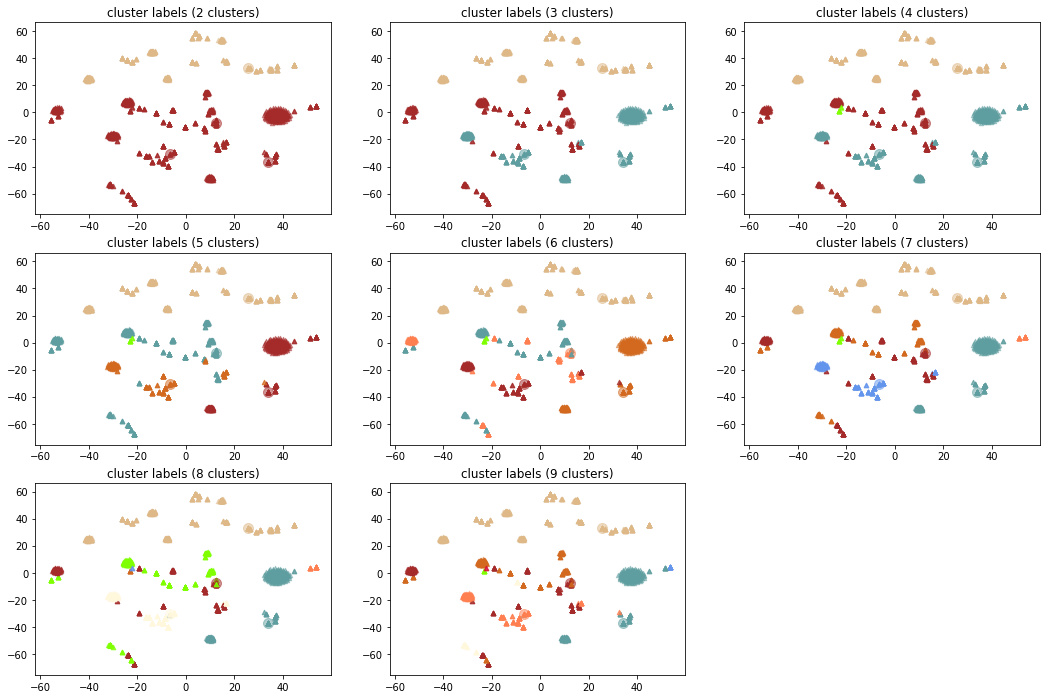

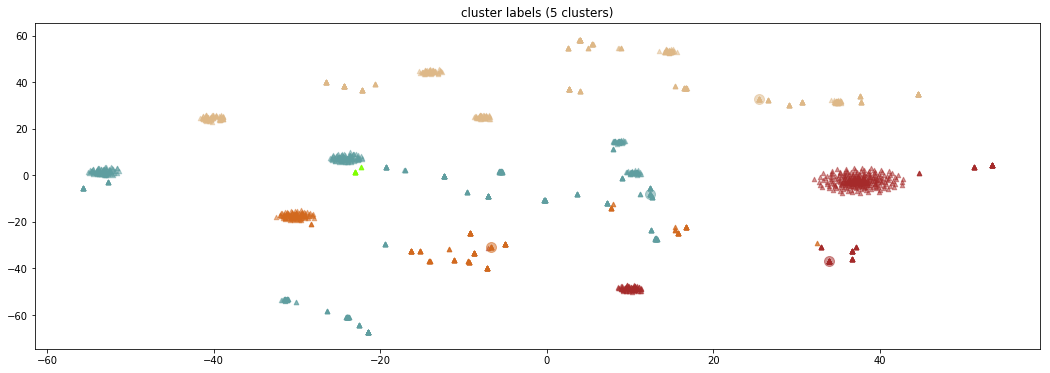

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked,KMeans_clusters_5
209,-0.000000,-0.000000,0.103970,-0.000000,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1,0
495,-0.000000,0.090377,0.091078,0.095727,-0.000000,0.075041,0.066570,0.066411,0.068538,0.066934,...,b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1,4
1610,-0.000000,0.089099,0.086865,0.086916,0.091221,0.070010,0.062826,0.060273,0.066035,0.061373,...,b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1,2
1835,0.127572,0.114688,0.111631,0.117882,0.116053,0.088584,0.079311,0.083231,0.080495,0.080552,...,b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1,1


0 cluster (#A52A2A)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
192,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
193,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
194,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
195,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
196,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
197,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
198,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
209,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
210,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,0


1 cluster (#DEB887)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
100,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
101,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
102,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
103,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
104,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
105,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
106,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
107,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
108,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
109,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


2 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
3,b' ',b'snr ',b'',b'snr',[],[],0,0
4,b' ',b'snr ',b'',b'snr',[],[],0,0
5,b' ',b'snr ',b'',b'snr',[],[],0,0
6,b' ',b'snr ',b'',b'snr',[],[],0,0
7,b' ',b'snr ',b'',b'snr',[],[],0,0
8,b' ',b'snr ',b'',b'snr',[],[],0,0
9,b' ',b'snr ',b'',b'snr',[],[],0,0
10,b' ',b'snr ',b'',b'snr',[],[],0,0


3 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1689,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1690,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1691,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1692,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1693,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1694,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1695,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1696,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1697,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1698,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0


4 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
271,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
272,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
495,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,1
496,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,0
497,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,0
498,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,0
499,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,0
500,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,0
501,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,0
502,b' ',b'PSR ',b'1FGL J1018.6-5856',b'bin',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],2,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.058733,0.057380,0.059297,0.057574,0.057661,0.0,0.059856,0.063269,0.066393,0.072080,0.076787
1,0.099367,0.091640,0.092748,0.093475,0.091497,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.063667,0.062835,0.071545,0.063194,0.062925,0.0,0.062143,0.063683,0.064549,0.065450,0.066769
3,0.073633,0.066852,0.066607,0.068126,0.065674,0.0,0.069468,0.067983,0.070016,0.016158,0.000000
4,0.064443,0.058044,0.060503,0.059829,0.057841,0.0,0.063450,0.064585,0.065528,0.066984,0.069775


In [22]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 5, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


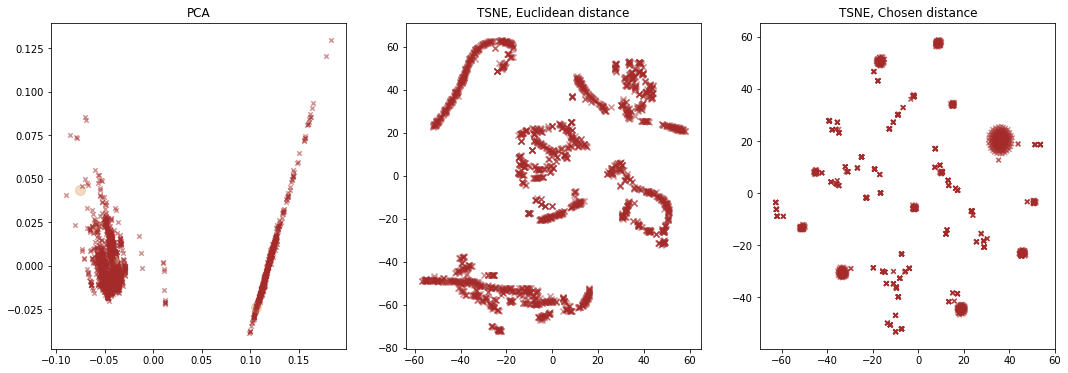

Clustering


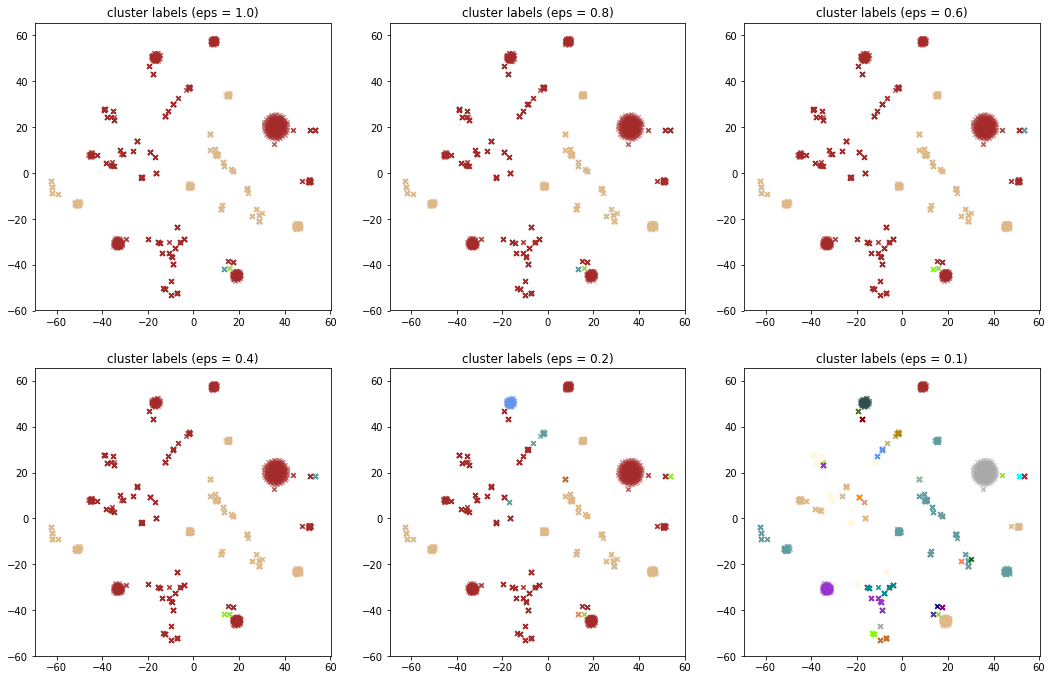

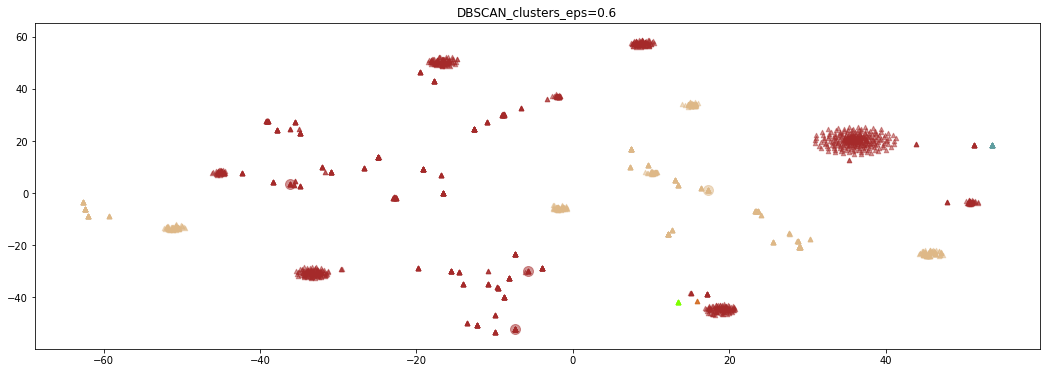

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked,DBSCAN_clusters_eps=0.6
209,-0.000000,-0.000000,0.103970,-0.000000,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1,0
495,-0.000000,0.090377,0.091078,0.095727,-0.000000,0.075041,0.066570,0.066411,0.068538,0.066934,...,b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1,0
1610,-0.000000,0.089099,0.086865,0.086916,0.091221,0.070010,0.062826,0.060273,0.066035,0.061373,...,b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1,0
1835,0.127572,0.114688,0.111631,0.117882,0.116053,0.088584,0.079311,0.083231,0.080495,0.080552,...,b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1,1


0 cluster (#A52A2A)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
1,b' ',b'snr ',b'',b'snr',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
3,b' ',b'snr ',b'',b'snr',[],[],0,0
4,b' ',b'snr ',b'',b'snr',[],[],0,0
5,b' ',b'snr ',b'',b'snr',[],[],0,0
6,b' ',b'snr ',b'',b'snr',[],[],0,0
7,b' ',b'snr ',b'',b'snr',[],[],0,0
8,b' ',b'snr ',b'',b'snr',[],[],0,0
9,b' ',b'snr ',b'',b'snr',[],[],0,0


1 cluster (#DEB887)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
100,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
101,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
102,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
103,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
104,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
105,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
106,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
107,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
108,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
109,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0


2 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
351,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
352,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
353,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
354,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
355,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
356,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
357,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
358,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
359,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
360,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0


3 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1689,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1690,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1691,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1692,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1693,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1694,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1695,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1696,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1697,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0
1698,b'1FGL J1848.1-0145c',b' ',b'',b'unid',[],[],0,0


4 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1832,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0
1833,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0
1834,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.062379,0.060139,0.065398,0.060770,0.060223,0.0,0.061712,0.063704,0.065213,0.067655,0.070300
1,0.099367,0.091640,0.092748,0.093475,0.091497,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.058056,0.055491,0.056798,0.055975,0.055529,0.0,0.062606,0.066962,0.073122,0.079872,0.086031
3,0.075635,0.065752,0.064610,0.067822,0.063810,0.0,0.070348,0.068353,0.070158,0.000000,0.000000
4,0.066961,0.070518,0.073262,0.069140,0.071884,0.0,0.066538,0.066748,0.069539,0.070017,0.000000


In [23]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

* ### energy distance

In [24]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [ ]:
spectra_2D  = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [ ]:
eps_l = [0.01 * i for i in range(20, 0, -3)]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)